<a href="https://colab.research.google.com/github/Strickerman/Deep-Learning-Introduction/blob/main/2A_IR_DL_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

authors: [Ali Ismail-Fawaz](https://hadifawaz1999.github.io/) and [Germain Forestier](https://germain-forestier.info/)

# Deep Learning: Introduction

## Import used packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Downloading the dataset

In [ ]:
!wget https://hadifawaz1999.github.io/teaching/Ensisa/2A-Info/DeepLearning/datasets/pokemon-stats-data.csv

--2026-01-14 06:37:43--  https://hadifawaz1999.github.io/teaching/Ensisa/2A-Info/DeepLearning/datasets/pokemon-stats-data.csv
Resolving hadifawaz1999.github.io (hadifawaz1999.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to hadifawaz1999.github.io (hadifawaz1999.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22598 (22K) [text/csv]
Saving to: ‘pokemon-stats-data.csv’

pokemon-stats-data. 100%[===================>]  22.07K  --.-KB/s    in 0.003s  

2026-01-14 06:37:43 (6.91 MB/s) - ‘pokemon-stats-data.csv’ saved [22598/22598]



## Reading the data

In [ ]:
df = pd.read_csv("pokemon-stats-data.csv")

df = df.dropna()
df.head()

,name,weight_kg,speed,sp_attack,sp_defense,type
0,Bulbasaur,6.9,45,65,65,grass
1,Ivysaur,13.0,60,80,80,grass
2,Venusaur,100.0,80,122,120,grass
3,Charmander,8.5,65,60,50,fire
4,Charmeleon,19.0,80,80,65,fire


## Extract the features to be used

In [ ]:
X = df["sp_attack"]
Y = df["sp_defense"]

print("Number of samples in the dataset is "+str(len(X)))

Number of samples in the dataset is 781


## Split the dataset into train and test sets

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=33/100, random_state=42)

print("Number of training examples is "+str(len(xtrain)))
print("Number of testing examples is "+str(len(xtest)))

Number of training examples is 523
Number of testing examples is 258


## Plot the 2D attributes

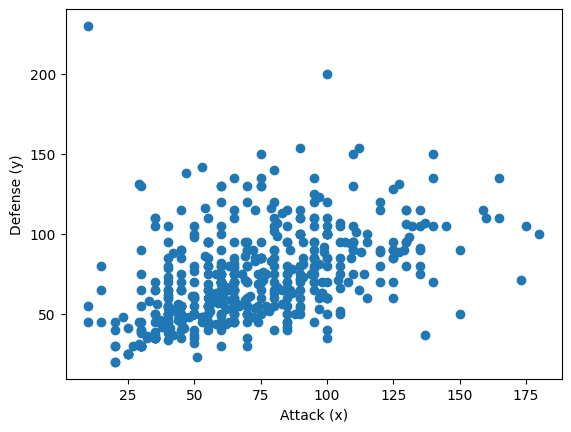

In [ ]:
plt.figure()
plt.scatter(xtrain, ytrain)
plt.xlabel("Attack (x)")
plt.ylabel("Defense (y)")
plt.show()
plt.close()

## Define your linear model as $ypred=w.x$

In [ ]:
def linear_model(x, w):
  ypred = w * x
  return ypred

## Define your error function (cost function) as $average((y-ypred)^2)$

In [ ]:
def error_function(y, ypred):
  error = np.square(y - ypred).mean()
  return error

## Try multiple values of $w$ and calculate the error function with respect to $w$

### Define the the list of possible values of $w$ ranging from $-2.0$ to $8.0$

In [ ]:
w_s = np.arange(start=-2.0, stop=8.0, step=0.01)
print(w_s)

[-2.00000000e+00 -1.99000000e+00 -1.98000000e+00 -1.97000000e+00
 -1.96000000e+00 -1.95000000e+00 -1.94000000e+00 -1.93000000e+00
 -1.92000000e+00 -1.91000000e+00 -1.90000000e+00 -1.89000000e+00
 -1.88000000e+00 -1.87000000e+00 -1.86000000e+00 -1.85000000e+00
 -1.84000000e+00 -1.83000000e+00 -1.82000000e+00 -1.81000000e+00
 -1.80000000e+00 -1.79000000e+00 -1.78000000e+00 -1.77000000e+00
 -1.76000000e+00 -1.75000000e+00 -1.74000000e+00 -1.73000000e+00
 -1.72000000e+00 -1.71000000e+00 -1.70000000e+00 -1.69000000e+00
 -1.68000000e+00 -1.67000000e+00 -1.66000000e+00 -1.65000000e+00
 -1.64000000e+00 -1.63000000e+00 -1.62000000e+00 -1.61000000e+00
 -1.60000000e+00 -1.59000000e+00 -1.58000000e+00 -1.57000000e+00
 -1.56000000e+00 -1.55000000e+00 -1.54000000e+00 -1.53000000e+00
 -1.52000000e+00 -1.51000000e+00 -1.50000000e+00 -1.49000000e+00
 -1.48000000e+00 -1.47000000e+00 -1.46000000e+00 -1.45000000e+00
 -1.44000000e+00 -1.43000000e+00 -1.42000000e+00 -1.41000000e+00
 -1.40000000e+00 -1.39000

### Define the empty list of errors for each value in $w_s$

In [ ]:
list_errors = np.zeros(shape=(w_s.shape), dtype=np.float32)

### Go through all values in $w_s$ and calculate the error

In [ ]:
for i in range(len(w_s)):
  w = w_s[i]
  ypred = linear_model(xtrain, w)
  list_errors[i] = error_function(ytrain, ypred)

### Plot the error function with respect to the values of $w_s$

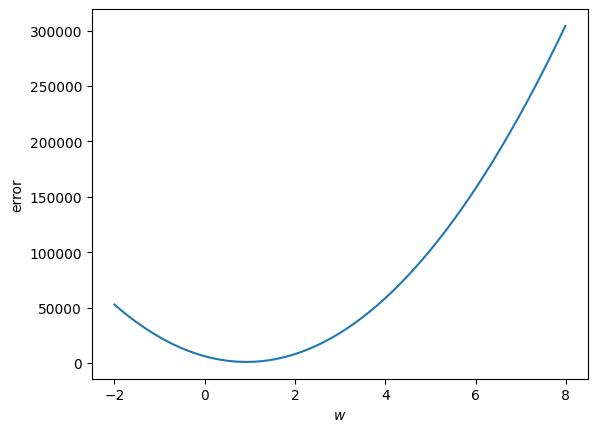

In [ ]:
plt.figure()
plt.plot(w_s, list_errors)
plt.xlabel(r'$w$')
plt.ylabel("error")
plt.show()
plt.close()

### Find the $w$ that minimizes the error

In [ ]:
index_w_best = list_errors.argmin()
error_train_min = list_errors.min()
w_best = w_s[index_w_best]

print("For w = "+str(w_best)+", the error on all training examples is = "+str(error_train_min))

For w = 0.9200000000000026, the error on all training examples is = 898.4006


### Evaluate the linear model for $w=w_{best}$ on the test set

In [ ]:
ypred = linear_model(xtest, w_best)
error_test = error_function(ytest, ypred)
print("For w = "+str(w_best)+", the error on all testing examples is = "+str(error_test))

For w = 0.9200000000000026, the error on all testing examples is = 748.6369798449633


### Visualize the prediction with respect to the true values on the test set

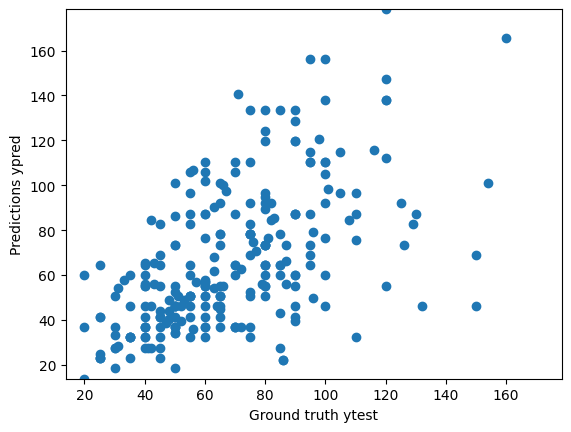

In [ ]:
min_ypred, min_ytest = np.min(ypred), np.min(ytest)
max_ypred, max_ytest = np.max(ypred), np.max(ytest)

plt.figure()
plt.scatter(ytest, ypred)
plt.xlim(min(min_ypred, min_ytest), max(max_ypred, max_ytest))
plt.ylim(min(min_ypred, min_ytest), max(max_ypred, max_ytest))
plt.xlabel("Ground truth ytest")
plt.ylabel("Predictions ypred")
plt.show()
plt.close()

### Plot the straight line $y=w_{best} . x$

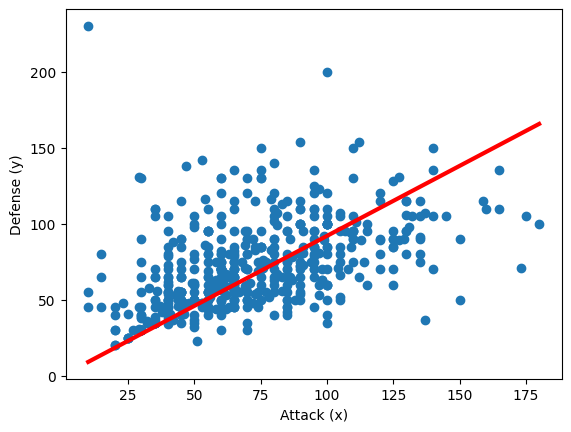

In [ ]:
# Choose min and max borders
x1 = np.min(xtrain)
x2 = np.max(xtrain)

y1 = linear_model(x1, w_best)
y2 = linear_model(x2, w_best)

plt.figure()
plt.scatter(xtrain, ytrain)
plt.plot([x1,x2],[y1,y2], lw=3, color='red')
plt.xlabel("Attack (x)")
plt.ylabel("Defense (y)")
plt.show()
plt.close()

# Exercise

## How can we improve the precision (reduce error) on test set ?

In [ ]:
# your code here